# BIKE SHARING DEMAND [ RMSLE:: 0.3194]

**Please star/upvote if u find it helpful.**

In [27]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 

In [28]:
train=pd.read_csv(r'../input/train.csv')
test=pd.read_csv(r'../input/test.csv')
df=train.copy()
test_df=test.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

###### A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

######  HERE ALL THE VARIABLES OR FEATURES ARE NUMERIC AND THE TARGET VARIABLE THAT WE HAVE TO PREDICT IS THE count VARIABLE. HENCE THIS IS A TYPICAL EXAMPLE OF A REGRESSION PROBLEM AS THE count VARIABLE IS CONTINUOUS VARIED.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [31]:
df.isnull().sum()  # implies no null values and hence no imputation needed ::).

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

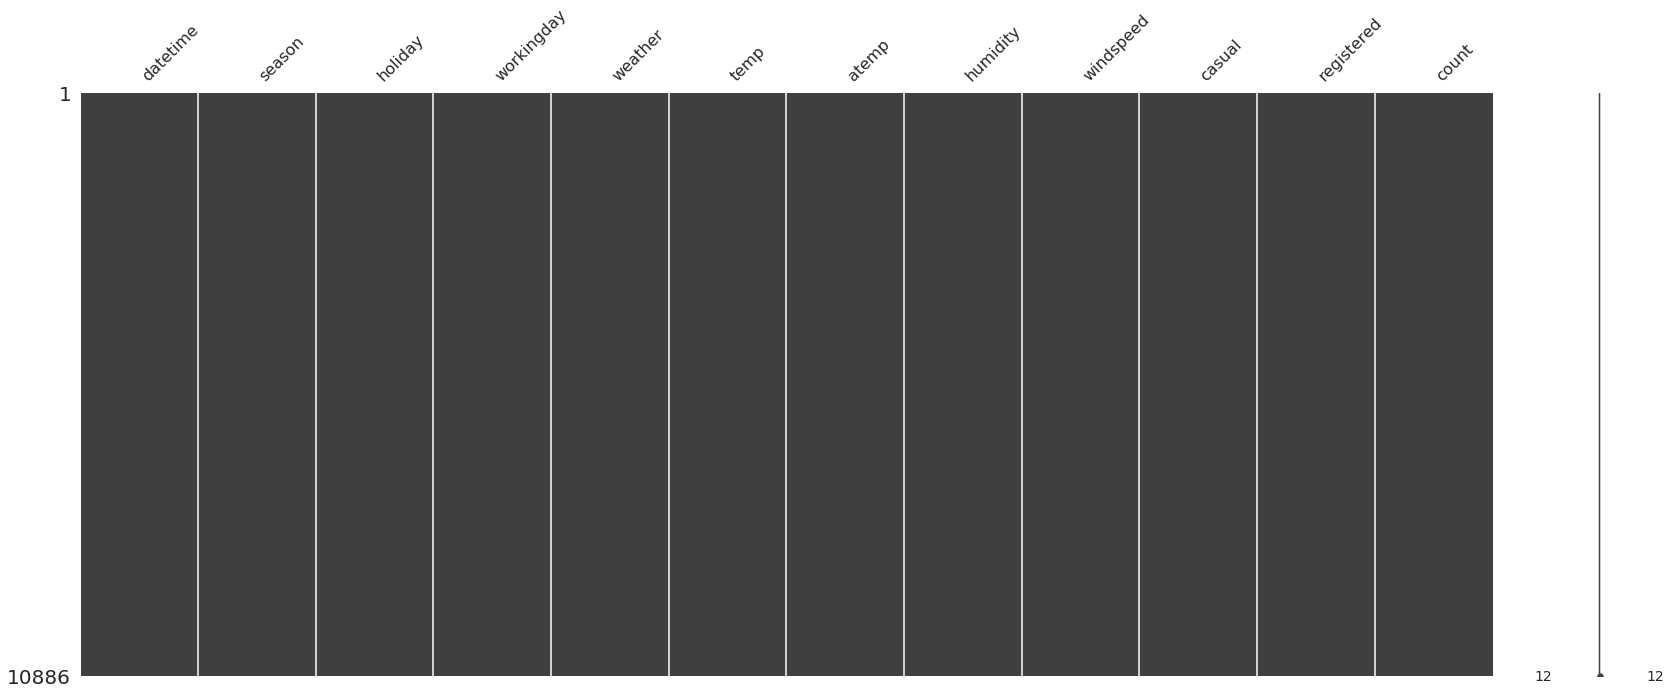

In [32]:
msno.matrix(df)  # just to visualize. no missing value.

######  NOW WE CAN EXPLORE OUR FEATURES. FIRST LETS EXPLORE THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES LIKE weather , season etc... .

In [33]:
# let us consider season.
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

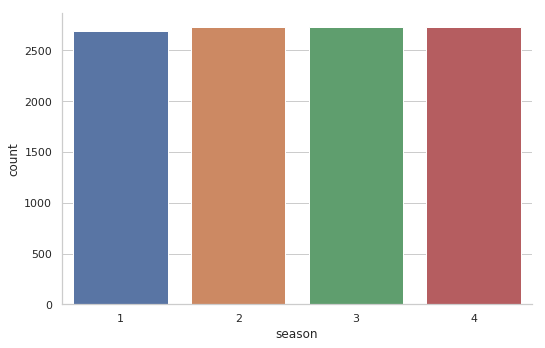

In [34]:
#sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

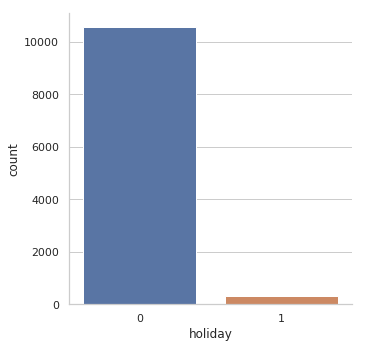

In [35]:
#holiday
df.holiday.value_counts()
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

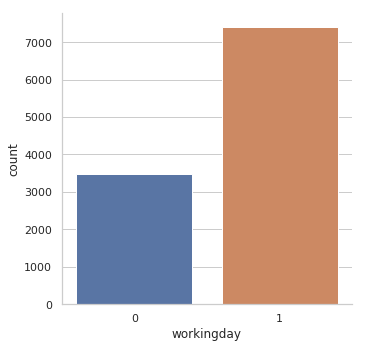

In [36]:
#holiday
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=1) # majority of data is for working days.

In [37]:
#weather
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

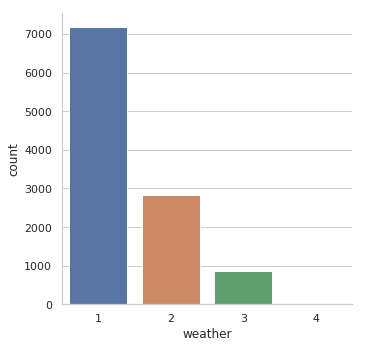

In [38]:
sns.factorplot(x='weather',data=df,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

######  NOW WE CAN  ALSO SEE DISTRIBUTION OF CONTINOUS VARIABLES.

In [39]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


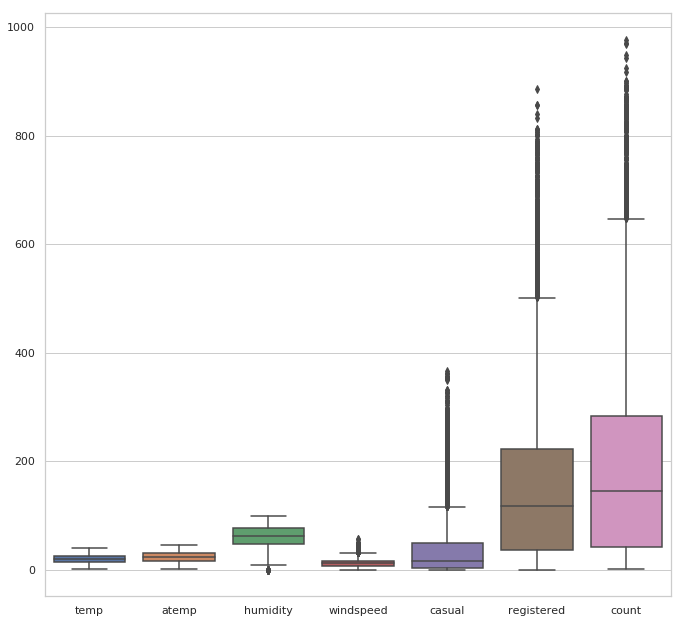

In [40]:
# just to visualize.
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

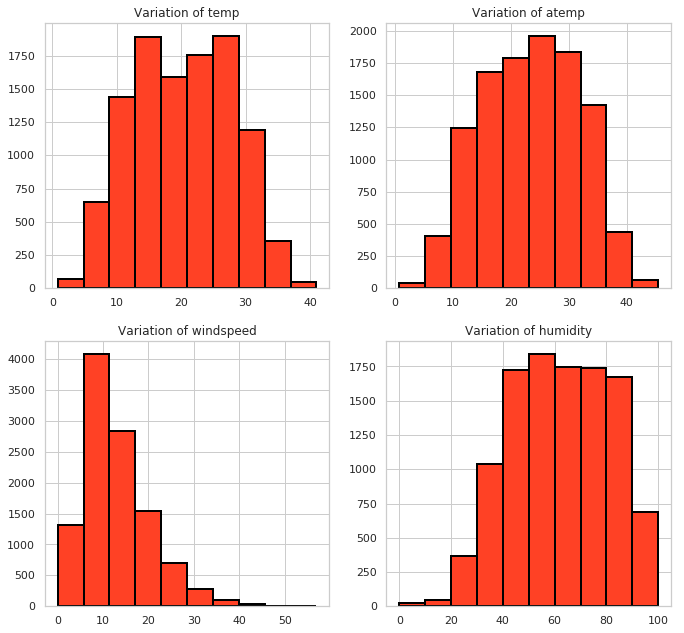

In [41]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

######  NOW AFTER SEEING THE DISTRIBUTION OF VARIOUS DISCRETE AS WELL AS CONTINUOUS VARIABLES WE CAN SEE THE INTERREALTION B/W THEM USING A HEAT MAP.

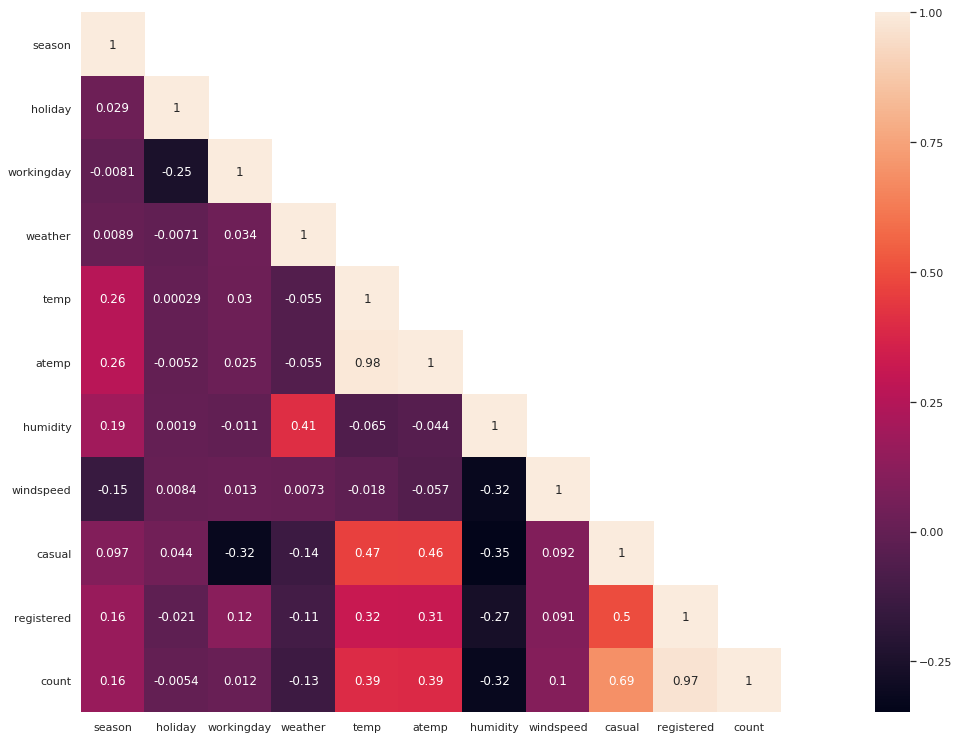

In [42]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

######  INFERENCES FROM THE ABOVE HEATMAP--

1. self realtion i.e. of a feature to itself is equal to 1 as expected.

2. temp and atemp are highly related as expected.
 
3. humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

4. also note that casual and working day are highly inversely related as you would expect.

5. Also note that count and holiday are highly inversely related as you would expect.

6. Also note that temp(or atemp) highly effects the count. 

7. Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that  weather is getting more worse and so lesser people will rent bikes.

8. registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

9. similarly we can draw some more inferences like weather and humidity and so on... .


######  NOW WE  CAN DO SOME FEATURE ENGINEERING AND GET SOME NEW FEATURES AND DROP SOME USELESS OR LESS RELEVANT FEATURES.

In [43]:
# # seperating season as per values. this is bcoz this will enhance features.
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [44]:
# # # same for weather. this is bcoz this will enhance features.
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [45]:
# # # now can drop weather and season.
df.drop(['season','weather'],inplace=True,axis=1)
df.head()
test_df.drop(['season','weather'],inplace=True,axis=1)
test_df.head()


# # # also I dont prefer both registered and casual but for ow just let them both.

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


######  now most importantly split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes.

In [46]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,4,5,1,0


In [47]:
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [48]:
# now can drop datetime column.
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,4,5,1,0


###### NOW LETS HAVE A LOOK AT OUR NEW FEATURES.

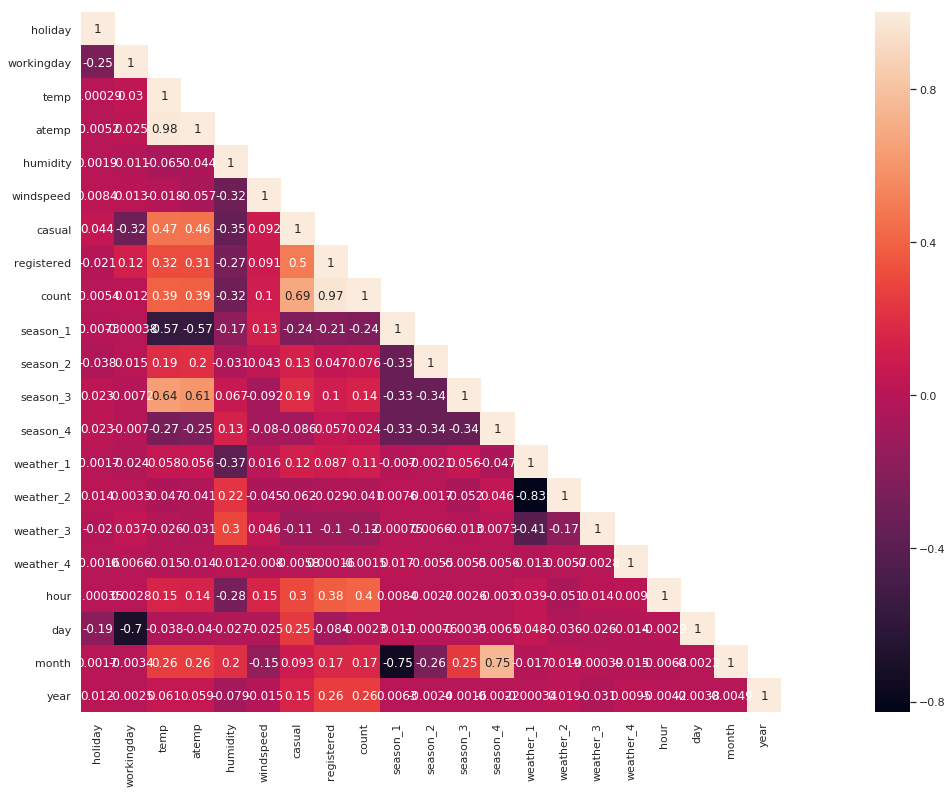

In [49]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [50]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [51]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


###### NOW LET SEE HOW COUNT VARIES WITH DIFFERENT FEATURES.

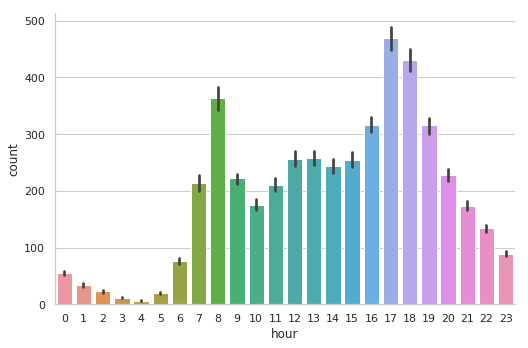

In [52]:
# with hour.
sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5)

######  note that the highest demand is in hours from say 7-10 and the from 15-19. this is bcoz in most of the metroploitan cities this is the        peak office time and so more people would be renting bikes. this is just one of the plausible reason.

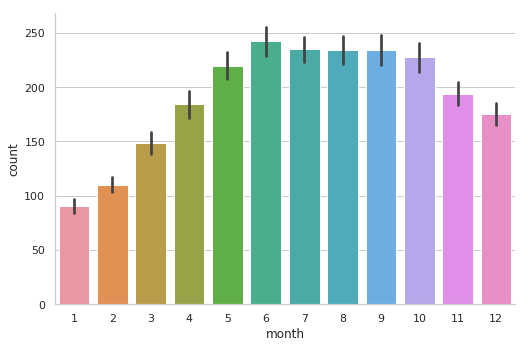

In [53]:
sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5)
# note that month affects season and that effects wheteher people take bike or not. like climate conditions rainy,hazy etc... .

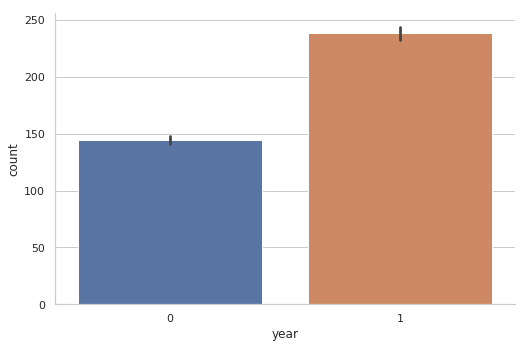

In [54]:
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)
# 0 for 2011 and 1 for 2012. Hence demand has increased over the years.

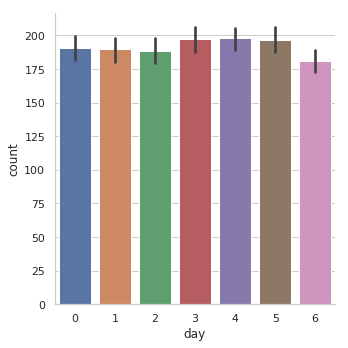

In [55]:
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1)

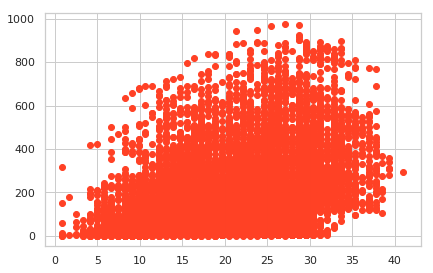

In [56]:
# for temp
plt.scatter(x="temp",y="count",data=df,color='#ff4125')

###### note that this way this is hard to visualze. a better way is to convert the 'temp' variable into intervals or so called bins and then treat it like a discrete variable.

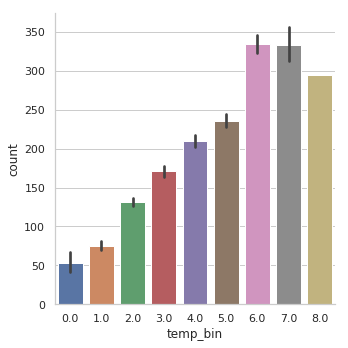

In [57]:
new_df=df.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

######  now the demand is highest for bins 6 and 7 which is about tempearure  30-35(bin 6) and 35-40 (bin 7).

In [58]:
# and similarly we can do for other continous variables and see how it effect the target variable.

###### NOW THE DATA EXPLORATION ,ANALYSIS AND VISUALIZATION  AND PREPROCESSING HAS BEEN DONE AND NOW WE CAN MOVE TO MODELLING PART.

In [59]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [60]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month',
        'year'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [61]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [62]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.3379781864052909,
  1.0379149443539446,
  0.33147810245400117,
  1.4341690757701235,
  0.8616609594892403]}

In [63]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.337978
1,AdaBoostRegressor,1.037915
2,BaggingRegressor,0.331478
3,SVR,1.434169
4,KNeighborsRegressor,0.861661


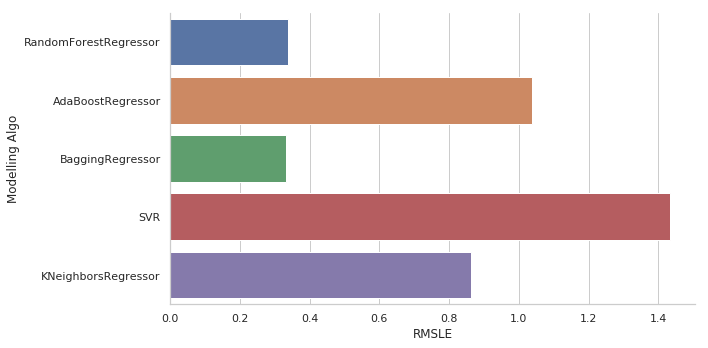

In [64]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

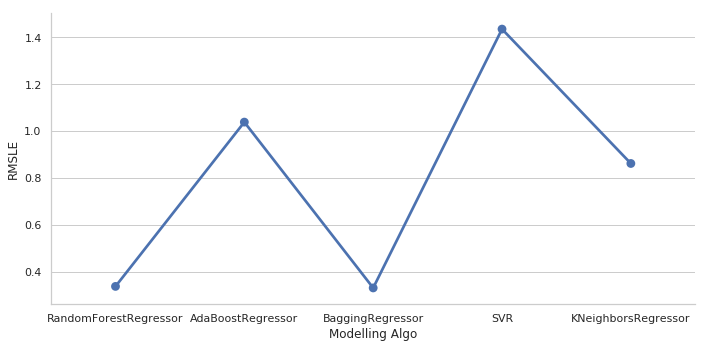

In [65]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

######  NOTE THAT THERE ARE OTHER MODELLING ALGOS LIKE LINEAR REGRESSION ,RIDGE AND RIDGECV BUT THE PROBLEM IS THAT THOSE MODELS ARE PREDICTING NEGATIVE VALUES FOR THE COUNT TARGET WHICH IS NOT POSSIBLE.                                                                                                                                                                                                                                                                                                                  NOW I DONT KNOW WHAT TO DO IN THOSE CASES :::) !!!!!!!!!!!!!!!

######  NOW LET'S TUNE A BIT...

In [66]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.32008141148035624


In [67]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [68]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))


0.8616609594892403


In [69]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

######  NOW RANDOM FORETS REGRESSOR GIVES THE LEAST RMSLE. HENCE WE USE IT TO MAKE PREDICTIONS ON KAGGLE.

In [71]:
pred=clf_rf.predict(test_df.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('submission_19.csv',index=False) # saving to a csv file for predictions on kaggle.


# THE END. [please star/upvote if u find it helpful.]